## ANALYSIS 2 

In [1]:
import pandas as pd
datafr=pd.read_csv(r"Other Files\YelpData.csv",encoding='utf-8')
countryliving='US'
datafr= datafr.ix[:,'id':]
cuisine=pd.read_csv(r"Other Files\RestaurantCategory.csv",encoding='utf-8')
datafr2_country=datafr[(datafr['country']==countryliving)]
unid=list(datafr2_country['id'].unique())
df_category=pd.DataFrame()
for i in range(len(unid)):
    t=cuisine[(cuisine['id']==unid[i])]
    df_category=df_category.append(t,ignore_index=True)

groupcategory=df_category.groupby(['title']).count().sort_values(['id'],ascending=False)
topgroups=groupcategory[0:5]
topcateg=list(topgroups.index.values)
groupcategory2=groupcategory.reset_index(drop=False).head(10)

In [2]:
cuisine=pd.read_csv(r"Other Files\RestaurantCategory.csv",encoding='utf-8')
cuisine.head()

,id,city,title,alias
0,80-proof-sydney,Sydney,Bars,bars
1,80-proof-sydney,Sydney,Australian,australian
2,alpha-restaurant-sydney,Sydney,Greek,greek
3,ambar-sydney,Sydney,Australian,australian
4,ambar-sydney,Sydney,Bars,bars


In [3]:
cuisine2 = cuisine[['city','title']]

In [4]:
cuisine3=pd.DataFrame({'count' : cuisine2.groupby(['city','title'])['title'].count().groupby(level=0, group_keys=False).nlargest(5)}).reset_index()

In [7]:
cuisine3.to_csv("Output CSV/Analysis 2/topcuisine.csv")

In [136]:
h=cuisine3.groupby('city').count().reset_index()['city'].to_frame()

In [137]:
userinput=input("Do you live in any of these cities? I have data only for these!")

Do you live in any of these cities? I have data only for these!Boston


In [138]:
cuisine4=cuisine3[cuisine3['city']==userinput]

      city                   title  count
16  Boston          American (New)     24
17  Boston                 Italian     18
18  Boston                 Seafood     18
19  Boston      Breakfast & Brunch     10
20  Boston  American (Traditional)      9


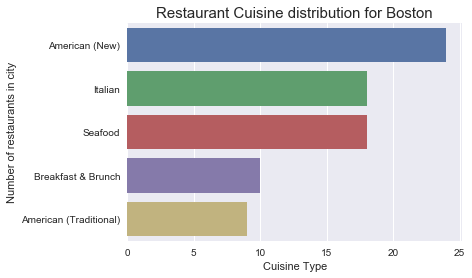

In [139]:
import matplotlib
import matplotlib.pyplot as plt
print(cuisine4)
%matplotlib inline
import seaborn as sns
#ax=sns.factorplot("title", "count",
#                               data=cuisine4, kind="bar",orient="h",
#                               size=10, palette="muted", legend=False)
#plt.savefig(r'Output Files\Analysis 1\Plot\Restaurant-Per-Capita.jpg')
ax = sns.barplot(x="count", y="title", orient= "h", data=cuisine4)
#print('CSV Files and Plots saved successfully')
ax.set(xlabel='Cuisine Type', ylabel='Number of restaurants in city')
plt.title("Restaurant Cuisine distribution for "+str(userinput),fontsize=15)
#for index, row in cuisine4.iterrows():
 #   ax.text(row.count,row.count, row.count, color='black', ha="center")
plt.show()

In [140]:
cuisineinput=input("What is your favourite cuisine? The above graph shows the top cuisines in "+str(userinput))

What is your favourite cuisine? The above graph shows the top cuisines in BostonBreakfast & Brunch


In [141]:
cuisinetorestaurant=cuisine[(cuisine['title']==cuisineinput)&(cuisine['city']==userinput)]

In [143]:
restids=list(cuisinetorestaurant['id'])





In [144]:
resss = pd.DataFrame({'id':restids})

In [145]:
restfinal=pd.merge(resss,datafr,how='left', left_on=['id'],right_on=['id'])

In [146]:
#Cheapest restaurant
restfinal['Price Rating Yelp']=restfinal['price'].str.len()

In [147]:
#Cheapest restaurant with highest rating
restfinalsort=restfinal.sort(['Price Rating Yelp','rating'], ascending=[True,False])

C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [149]:
import pandas as pd
openhours=pd.read_csv("Other Files\\Restaurant_Open_Hours.csv")

In [150]:
timing=openhours[openhours['id']==restfinalsort.iloc[0]['id']]

In [151]:
timing['start']=timing['start'].astype(str)
timing['start'] = timing['start'].apply(lambda x: x.zfill(4))
timing['end']=timing['end'].astype(str)
timing['end']=timing['end'].apply(lambda x: x.zfill(4))

C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [152]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

timing['day_of_week'] = timing['day'].apply(lambda x: days[x])


C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [153]:
timing

,id,city,county,day,start,end,overnight,day_of_week
11930,mike-and-pattys-boston,Boston,US,0,0800,1400,False,Mon
11931,mike-and-pattys-boston,Boston,US,1,0800,1400,False,Tue
11932,mike-and-pattys-boston,Boston,US,2,0730,1400,False,Wed
11933,mike-and-pattys-boston,Boston,US,3,0730,1400,False,Thu
11934,mike-and-pattys-boston,Boston,US,4,0730,1400,False,Fri
11935,mike-and-pattys-boston,Boston,US,5,0730,1430,False,Sat
11936,mike-and-pattys-boston,Boston,US,6,0730,1430,False,Sun


In [154]:
timing_df=timing[['day_of_week','start','end']]

In [155]:
timing_df

,day_of_week,start,end
11930,Mon,0800,1400
11931,Tue,0800,1400
11932,Wed,0730,1400
11933,Thu,0730,1400
11934,Fri,0730,1400
11935,Sat,0730,1430
11936,Sun,0730,1430


HERE ARE THE DETAILS OF THE CHEAPEST RESTAURANT IN TOWN WITH BEST RATING!!
**************************************************************************
Name : Mike & Patty's
Rating: 4.5
Restaurant Timings
Day Start End
Mon 0800 1400
Tue 0800 1400
Wed 0730 1400
Thu 0730 1400
Fri 0730 1400
Sat 0730 1430
Sun 0730 1430


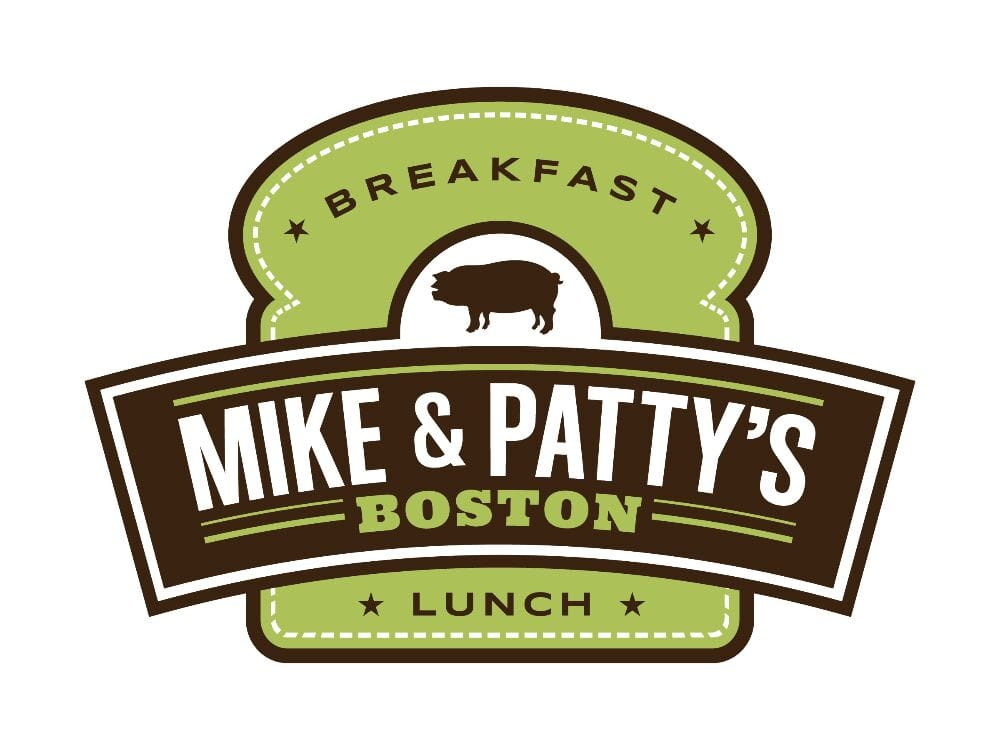

In [156]:
print("HERE ARE THE DETAILS OF THE CHEAPEST RESTAURANT IN TOWN WITH BEST RATING!!")
print("**************************************************************************")
print("Name : "+restfinalsort.iloc[0]['name'])
print("Rating: "+str(restfinalsort.iloc[0]['rating']))
print("Restaurant Timings")
print('Day','Start','End')
for index, row in timing_df.iterrows():
    print (row['day_of_week'],row['start'],row['end'])
import matplotlib
%matplotlib inline
from PIL import Image
import urllib.request

URL = restfinalsort.iloc[0]['image']

with urllib.request.urlopen(URL) as url:
    with open('Images\\'+str(restfinalsort.iloc[0]['id'])+'.jpg', "wb") as f:
        f.write(url.read())

from IPython.display import Image
Image(filename='Images\\'+str(restfinalsort.iloc[0]['id'])+'.jpg',width=300,height=300)

In [157]:
#Highest review rated restaurant with maximum review count
restfinalsortrev=restfinal.sort(['rating','review_count'], ascending=[False,False])

C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


'fin-point-boston'

In [158]:
timing2=openhours[openhours['id']==restfinalsortrev.iloc[0]['id']]

In [159]:
timing2['start']=timing2['start'].astype(str)
timing2['start'] = timing2['start'].apply(lambda x: x.zfill(4))
timing2['end']=timing2['end'].astype(str)
timing2['end']=timing2['end'].apply(lambda x: x.zfill(4))

C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [160]:
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

timing2['day_of_week'] = timing2['day'].apply(lambda x: days[x])


C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [169]:
restfinalsortrev.iloc[0]

id                                                    fin-point-boston
name                                                         Fin Point
review_count                                                        34
price                                                              $$$
is_closed                                                        False
latitude                                                       42.3575
longitude                                                     -71.0528
city                                                            Boston
state                                                               MA
zip_code                                                         02110
country                                                             US
rating                                                               5
phone                                                      1.61735e+10
term                                                       restaurants
image 

In [161]:
timing_df2=timing2[['day_of_week','start','end']]

HERE ARE THE DETAILS OF THE BEST RESTAURANT IN TOWN BASED ON RATING AND REVIEWS!!
*********************************************************************************
Name : Fin Point
Rating: 5.0
Restaurant Timings
Day Start End
Mon 0630 0000
Tue 0630 0000
Wed 0630 0000
Thu 0630 0000
Fri 0630 0000
Sat 0630 0000
Sun 0700 0000


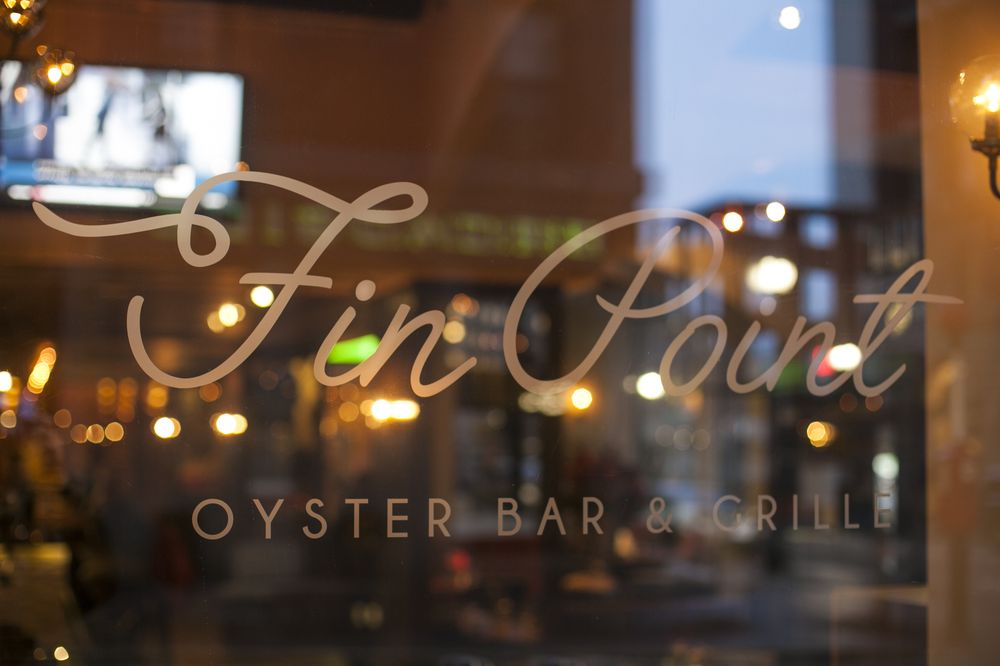

In [172]:
print("HERE ARE THE DETAILS OF THE BEST RESTAURANT IN TOWN BASED ON RATING AND REVIEWS!!")
print("*********************************************************************************")
print("Name : "+restfinalsortrev.iloc[0]['name'])
print("Rating: "+str(restfinalsortrev.iloc[0]['rating']))
print("Restaurant Timings")
print('Day','Start','End')
for index, row in timing_df2.iterrows():
    print (row['day_of_week'],row['start'],row['end'])
import matplotlib
%matplotlib inline
from PIL import Image
import urllib.request

URL = restfinalsortrev.iloc[0]['image']

with urllib.request.urlopen(URL) as url:
    with open('Images\\'+str(restfinalsortrev.iloc[0]['id'])+'.jpg', "wb") as f:
        f.write(url.read())

from IPython.display import Image
Image(filename='Images\\'+str(restfinalsortrev.iloc[0]['id'])+'.jpg',width=300,height=300)

In [ ]:
cuisine

In [ ]:
pd.DataFrame(cuisine3.groupby('title')['count'].nlargest(5)).reset_index()

In [ ]:
cuisine3.to_csv('Other Files//CuisineAnalysis.csv')